<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/Estimacion_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimación estadística.**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
%precision %.6f

'%.6f'

Estimación estadística.
Consiste en inferir propiedades de una población a partir de muestras obtenidas de ella.

Usando la distribución normal vamos a tratar de inferir la media de la población a partir de muestras aleatorias.

Actividad: Crear un arreglo con 10,000 datos aleatorios tomados de una distribución normal con media 0 y desviación estándar 0.1, esta será nuestra población.


1.   Obtener la media poblacional.
2.   Obtener 50 muestras aleatorias tomadas de la población.
3.   Calcular la media de cada muestra y guardarla en un arreglo.
4.   Calcular la media del arreglo de medias y compararla con la media poblacional.
5.   Aumentar la cantidad de muestras generadas y repetir los pasos 3 y 4.



Definamos la media y la desviación estándar de nuestra distribución normal.

In [0]:
mu=0
sigma=0.1

Ahora vamos a usar la función [normal()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) de numpy para crear un arreglo de 10,000 números correspondientes a una distribución normal con media 0 y desviación estándar 0.1.

In [0]:
dn=np.random.normal(mu, sigma, 10000)

In [5]:
dn

array([-0.04271985, -0.07674248,  0.04883676, ..., -0.08526513,
        0.10146617,  0.11570149])

In [6]:
len(dn)

10000

Ahora podemos calcular la media de nuestra población dn.

In [7]:
dn.mean()

0.000734

Ahora vamos a generar 50 muestras aleatorias de tamaño 30. A cada muestra le calcularemos la media y la guardaremos en una lista.

In [0]:
dm_medias=[]
for i in range(50):
    t=np.random.choice(dn,30)      #Crea una muestra aleatoria de tamaño 30 usando a dn como población.
    dm_medias.append(np.mean(t))   #agrega la media de t a la lista dm_medias

Ahora podemos calcular la media de nuestro conjunto de medias. Esto nos permitirá establecer si la media poblacional, denotada por $\mu$, se puede estimar por medio de la media de las medias de las muestras, denotada por $\mu_{\bar{x}}$

In [9]:
np.mean(dm_medias)

0.005075

Este valor se aproxima a $\mu$, sin embargo podemos verificar que pasa si obtenemos más muestras.

In [0]:
dm_medias2=[]
for i in range(500):
    t=np.random.choice(dn,30)      #Crea una muestra aleatoria de tamaño 30 usando a dn como población.
    dm_medias2.append(np.mean(t))   #agrega la media de t a la lista dm_medias

In [11]:
np.mean(dm_medias2)

0.000860

Probemos con más muestras.

In [0]:
dm_medias3=[]
for i in range(700):
    t=np.random.choice(dn,30)      #Crea una muestra aleatoria de tamaño 30 usando a dn como población.
    dm_medias3.append(np.mean(t))   #agrega la media de t a la lista dm_medias

In [13]:
np.mean(dm_medias3)

0.000278

Ahora sí podemos decir que hemos obtenido una buena aproximación de $\mu$ usando a $\mu_{\bar{x}}$.

Actividad: Generar 1,000 muestras aleatorias, de tamaño 50, tomadas de una distribución normal con media 0 y desviación estándar 1. 


1.   Crear un arreglo de 1,000 elementos inicializado a ceros.
2.   Almacenar en el arreglo del paso anterior las medias de las 1,000 muestras aleatorias.
3.   Crear un histograma para el arreglo con las medias de las muestras. Discutir si el histograma y el resultado de la actividad anterior permiten llegar a una conclusión sobre la estimación de los parámetros poblacionales a partir de la respectiva estádistica de la muestra.
4.   Cambiar el tamaño de las muestras a 20 y repetir los pasos 2 y 3. Discutir el rol del tamaño de las muestras en la estimación.



Veamos otro ejemplo usando $\mu_{\bar{x}}$. Una vez más definamos los parámetros de nuestra distribución normal.

In [0]:
mu = 0
sigma_2 = 1

Ahora el número de muestras y el tamaño de las mismas. Además crearemos un arreglo inicializado a ceros usando la función [zeros()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html).

In [0]:
NUM_SAMPLES = 1000
n = 50

mu_hat = np.zeros(NUM_SAMPLES)

Una vez más, vamos a calcular las medias de las muestras aleatorias tomadas de la distribución muestral. Dado que en este caso elegimos los parámetros de una distribución normal estándar, podemos usar la función [randn()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html).

In [0]:
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) 
    mu_hat[i] = np.mean(y)

En esta ocasión vamos a graficar el histograma de las medias de las muestras.

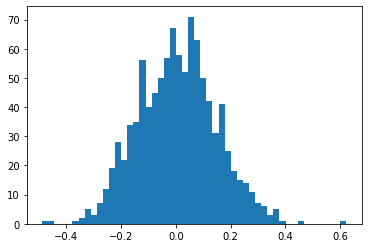

In [17]:
plt.hist(mu_hat,50)
plt.show()

Lo anterior es un indicio de que la distribución de medias de las muestras sigue a una distribución normal con $\mu=0$ y $\sigma^2=1$.

Veamos que sucede si tomamos muestras más pequeñas.

In [0]:
n=20

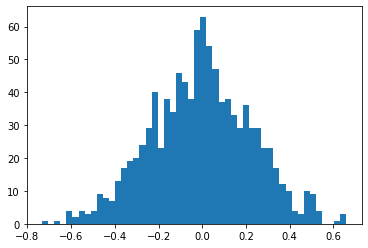

In [19]:
mu_hat = np.zeros(NUM_SAMPLES)
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) 
    mu_hat[i] = np.mean(y)
plt.hist(mu_hat,50)
plt.show()

In [20]:
mu_hat.mean()

-0.005450

El histograma y la media de las medias de muestras, indican que para $n=20$ la distribución no se asemeja tanto a una distribución normal



---



Ahora veamos algo equivalente usando la varianza de 10,000 muestras tomadas de una distribución normal con media $\mu=0$ y $\sigma^2=1$.

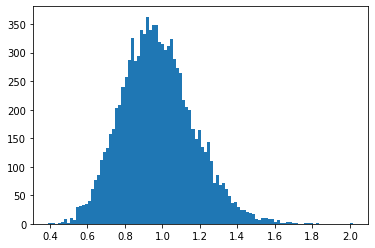

In [21]:
NUM_SAMPLES = 10000
n = 50

sigma_2_hat = np.zeros(NUM_SAMPLES)
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) 
    mu_hat = np.mean(y)
    sigma_2_hat[i] = np.mean((y - mu_hat)**2)

plt.hist(sigma_2_hat,100)
plt.show()


Este histograma sugiere que la distribución de las varianzas correspondientes a muestras aleatorias simples no sigue a una distribución normal estándar.

Manipulando el sesgo. Vamos a ver qué sucede con el histograma de las medias de muestras a las cuales se les aplica un sesgo arbitrario.



In [0]:
NUM_SAMPLES = 10000
n = 10
c1 = 10
c2 = 50

Tres arreglos inicializados a cero.

In [0]:
mu_hat_ub = np.zeros(NUM_SAMPLES) 
mu_hat_b1 = np.zeros(NUM_SAMPLES) 
mu_hat_b2 = np.zeros(NUM_SAMPLES) 

Ahora vamos a crear los arreglos de las medias de las muestras.

In [0]:
for i in range(0,NUM_SAMPLES):
    y = np.random.randn(n) + 1#n i.i.d. samples where the mean is 1!
    mu_hat_ub[i] = np.mean(y)           #el estimado insesgado
    mu_hat_b1[i] = n/(n+c1)*np.mean(y)  #el primer estimado sesgado
    mu_hat_b2[i] = n/(n+c2)*np.mean(y)  #el segundo estimado sesgado

Y a graficar sus histogramas.

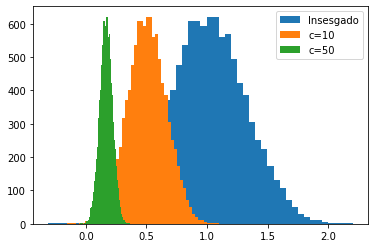

In [25]:
plt.hist(mu_hat_ub,50)
plt.hist(mu_hat_b1,50)
plt.hist(mu_hat_b2,50)
plt.gca().legend(['Insesgado','c='+str(c1),'c='+str(c2)])
plt.show()

Lo que hemos obtenido con estos cálculos e histogramas nos permite confirmar que las medias de las muestras siguen una distribución normal, mientras las varianzas no. 

Si la media de una estimación, como las medias de las muestras o las varianzas de las muestras, coincide con el parámetro poblacional (media poblacional o varianza poblacional), se dice que tenemos un estimador insesgado. Por lo tanto **la media de las muestras es un estimador insesgado, mientras que la varianza de las muestras es un estimado sesgado.**

**La distribución muestral de las medias de muestreo** es el conjunto de todos los posibles valores de la media de muestreo (medias de las muestras) $\bar{x}$ con las probabilidades de ocurrencia de los posibles valores. 

El **error de muestreo** es el valor absoluto de la diferencia entre la media de la muestra y la media de la población. Esto es 

error de muestreo=$|\bar{x}-\mu|$.



In [0]:
mu=dn.mean()

In [0]:
xb=np.mean(np.random.choice(dn,30))      #Crea una muestra aleatoria de tamaño 30 usando a dn como población.


In [28]:
np.abs(xb-mu)

0.016895

El **error estándar de la media** es la desviación estándar de la media de muestreo.

In [0]:
mm=[]
for i in range(200):
    t=np.random.choice(dn,50)
    mm.append(np.mean(t))

In [32]:
np.std(mm)

0.012697

La relación entre la media de las medias de las muestras $\mu_{\bar{x}}$ y la media poblacional $\mu$ es

$\mu_{\bar{x}}=\mu$.

La relación entre la varianza delas medias de las muestras $\sigma_{\bar{x}}^2$ y la varianza poblacional $\sigma^2$ es 

$\sigma_{\bar{x}}^2=\left(\frac{\sigma^2}{n}\right)\left(\frac{N-n}{N-1}\right)$

donde $N$ es el tamaño de la población y $n$ es el tamaño de la muestra. Así el error estándar es

$\sigma_{\bar{x}}=\left(\frac{\sigma}{\sqrt{n}}\right)\sqrt{\frac{N-n}{N-1}}$

al factor $\sqrt{\frac{N-n}{N-1}}$ se le llama **factor de corrección por población finita**. Si $n<0.05 N$ el error estándar de la media se toma como 

$\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$


Actividad 1:


1.   Crear dos poblaciones de 1,000,000 de elementos. Una tomada de una distribución normal con media 100 y desviación estándar 50. Y la otra tomada de una [distribución uniforme](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html).

2.   Para cada población calcular las medias de 1000 muestras y almacenarlas.

3.   Verificar que $\mu_{\bar{x}}=\mu$ y que 

$\sigma_{\bar{x}}^2=\left(\frac{\sigma^2}{n}\right)\left(\frac{N-n}{N-1}\right)$.

4.   Calcular el valor de $n$ tal que $n<0.05 N$.

El teorema del límite central establece que cuando se hace muestreo de una población grande que siga cualquier distribución, las medias de las muestras tienen una distribución normal siempre y cuando el tamaño de la muestra sea 30 o más. 

Actividad 2:



1.   Calcular $z=\frac{\bar{x}-\mu}{\sigma_{\bar{x}}}$ para 100 muestras de tamaño mayor o igual a 30 tomadas de la población uniforme del ejercicio anterior.
2.   Realizar un análisis descriptivo de los valores de $z$ y determinar si siguen una distribución normal.




---




Estimación de intervalos.

Un **intervalo de confianza** es un intervalo estimado que consiste de un intervalo de números obtenido de un estimado puntual, correspondiente a un parámetro, con un porcentaje que especifica la confianza que se tiene de que el parámetro esté en el intervalo. El porcentaje de confianza se llama **nivel de confianza**.

Si el tamaño de las muestras $n>=30$, entonces la variable 

$z=\frac{\bar{x}-\mu}{\sigma_{\bar{x}}}$

sigue una distribución normal. El 95% del área bajo la curva normal estándar está entre $z=-1.96$ y $z=1.96$, entonces

$-1.96<\frac{\bar{x}-\mu}{\sigma_{\bar{x}}}<1.96$;

$\bar{x}-1.96\sigma_{\bar{x}}<\mu<\bar{x}+1.96\sigma_{\bar{x}}$.

Este intervalo es llamado intervalo de confianza del 95% para la media poblacional $\mu$. La forma general es

$\bar{x}-z\sigma_{\bar{x}}<\mu<\bar{x}+z\sigma_{\bar{x}}$.

Actividad 3: Calcular el intervalo de confianza para del 95% para las poblaciones normal y uniforme de la actividad 1.

Definiciones de probabilidad.
